In [98]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
def simulate_ReRe(init_point, num_particles, beta_U, n_arr, a1, a2, hx):
    """
    a1: position of reflecting boundary (lower boundary)
    a2: position of reflecting boundary (upper boundary)
    """
    position_arr = init_point * np.ones(num_particles, dtype=float)
    step_size = hx
    n_arr = np.round(n_arr, decimals=5)
    # count the number of particles fall on accounted position, to obtain Pst(x0)
    count_n = np.zeros(n_arr.size)
    count_n_equ = np.zeros(n_arr.size)
    for i in np.arange(position_arr.size):
        # Find indices where the array elements are equal to the value
        indices = np.where(n_arr == position_arr[i])
        count_n[indices] += 1
    # # 2d array of first passage time: each row is for one experiment, each column is for one accounted position
    # ti_n = np.zeros((num_particles, n_arr.size))
    # abort_ti_n = np.array([])

    # iteration numbers, can be converted to time
    num_iter = 0
    # Keep generating random steps until all the walkers escape from [a, b)
    while num_iter < 500000:
        num_iter += 1
        # Metropolis algorithm
        trial_position_arr = position_arr + np.random.choice(
            [-step_size, step_size], size=position_arr.size
        )
        # Use np.where() to find indices of walkers outside reflecting boundary
        lower_reflect_id = np.where(trial_position_arr < a1-step_size/4)
        trial_position_arr[lower_reflect_id] += step_size
        # Use np.where() to find indices of walkers outside reflecting boundary
        upper_reflect_id = np.where(trial_position_arr > a2+step_size/4)
        trial_position_arr[upper_reflect_id] -= step_size

        # Calculate beta * delta_U(potential energy difference: U_new-U_old)
        energy_difference_arr = beta_U(trial_position_arr) - beta_U(position_arr)
        # Accepting condition for the move, criteria: min[1, exp(-beta*delta_U)]
        accept_move = np.random.rand(position_arr.size) < np.exp(-energy_difference_arr)
        position_arr[accept_move] = trial_position_arr[accept_move]

        # Round values to a specific precision for better collection and comparison
        position_arr = np.round(position_arr, decimals=5)
        # Collect Pst and MFPT
        for i in np.arange(position_arr.size):
            # Find indices where the obtained position fall on the n_arr
            idx_n = np.where(position_arr[i] == n_arr)
            if idx_n[0].size == 1:
                count_n[idx_n] += 1
                if num_iter > 100000:
                    count_n_equ[idx_n] += 1

                # if ti_n[i, idx_n] == 0:
                #     # Note: require to modify mfpt at initial position to be 0
                #     ti_n[i, idx_n] = num_iter

        # Use np.where() to find indices of values exceed the absorbing boundary
        # indices = np.where(position_arr > b-step_size/4)
        # Each simulation is aborted once the walker exceed absorbing boundary
        # abort_ti_n = np.append(abort_ti_n, ti_n[indices])
        # ti_n = np.delete(ti_n, indices, axis=0)
        # position_arr = np.delete(position_arr, indices)

    # abort_ti_n = abort_ti_n.reshape((num_particles, n_arr.size))
    return count_n, count_n_equ #, abort_ti_n

In [101]:
def beta_U(x):
    result = -4*(x**2-x)  # concave potential
    return result

In [102]:
a1 = 0   # location of reflecting boundary
a2 = 1   # location of absorbing boundary
h = 0.01
N = round((a2-a1)/h+1)
x2_arr = np.linspace(a1, a2, N)

In [103]:
num_particles = 300
init_position = 0.25
hx = h
n2_arr = np.arange(a1, a2+h/2, h)
n2_arr = np.round(n2_arr, decimals=5)
count_n2, count_n2_equ = simulate_ReRe(init_point=init_position, num_particles=num_particles, beta_U=beta_U, n_arr=n2_arr, a1=a1, a2=a2, hx=hx)

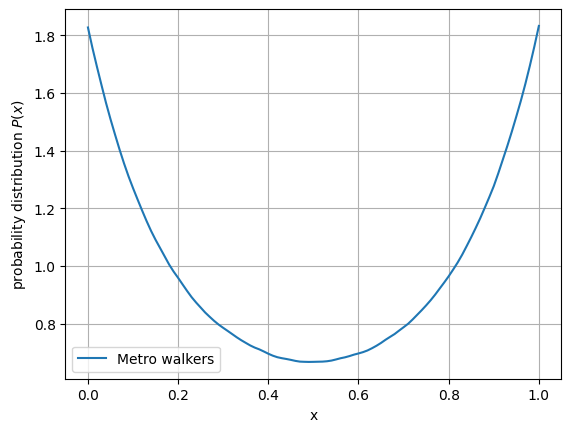

In [104]:
Pst_n2 = count_n2/(h*np.sum(count_n2))
plt.plot(n2_arr, Pst_n2, label="Metro walkers")


plt.xlabel('x')
plt.ylabel("probability distribution $P(x)$")
plt.legend()
plt.grid()

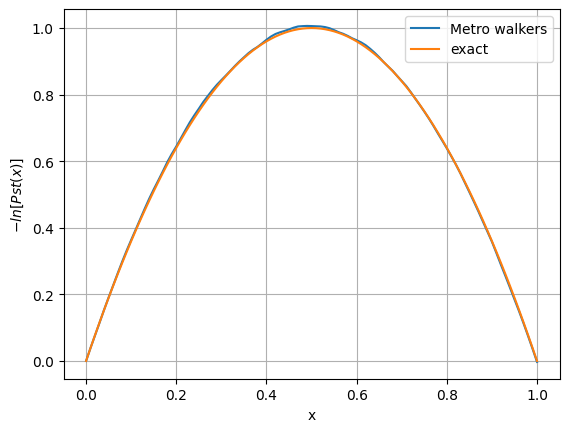

In [105]:
plt.plot(x2_arr, -np.log(Pst_n2)+beta_U(n2_arr)[0]-(-np.log(Pst_n2)[0]), label='Metro walkers')
plt.plot(n2_arr, beta_U(n2_arr), label="exact")
plt.xlabel('x')
plt.ylabel("$-ln[Pst(x)]$")
plt.grid()
plt.legend()

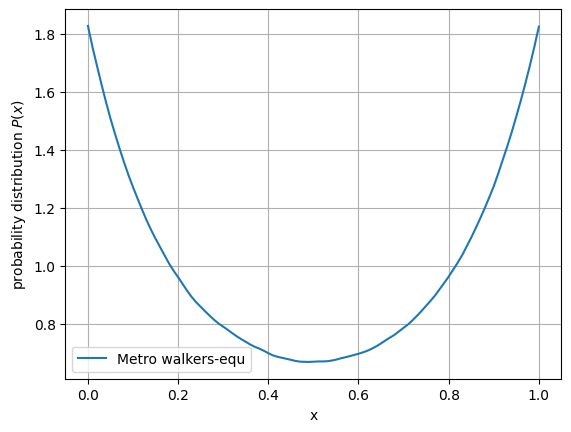

In [106]:
Pst_n2_equ = count_n2_equ/(h*np.sum(count_n2_equ))
plt.plot(n2_arr, Pst_n2_equ, label="Metro walkers-equ")

plt.xlabel('x')
plt.ylabel("probability distribution $P(x)$")
plt.legend()
plt.grid()

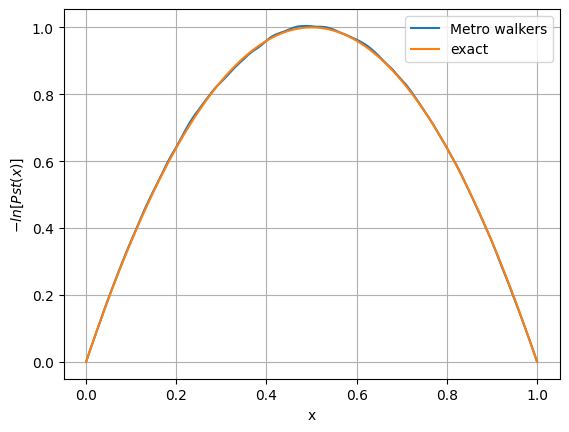

In [107]:
plt.plot(x2_arr, -np.log(Pst_n2_equ)+beta_U(n2_arr)[0]-(-np.log(Pst_n2_equ)[0]), label='Metro walkers')
plt.plot(n2_arr, beta_U(n2_arr), label="exact")
plt.xlabel('x')
plt.ylabel("$-ln[Pst(x)]$")
plt.grid()
plt.legend()

In [108]:
Pst_n2

array([1.82700368, 1.75587849, 1.69060129, 1.62765141, 1.5659442 ,
       1.50933631, 1.45615842, 1.40446186, 1.35597795, 1.31115738,
       1.27016679, 1.2312162 , 1.19306828, 1.15627102, 1.12193109,
       1.09098915, 1.06259054, 1.03411193, 1.00554866, 0.98097804,
       0.95915742, 0.93624546, 0.91360284, 0.89215622, 0.87347692,
       0.85633562, 0.83902299, 0.82420835, 0.80989771, 0.79706041,
       0.78589176, 0.77516578, 0.7642058 , 0.75319516, 0.74307918,
       0.7338992 , 0.72488255, 0.7174499 , 0.71139191, 0.70404393,
       0.69628461, 0.68947329, 0.68422196, 0.68079264, 0.67805664,
       0.67494798, 0.67145399, 0.66892666, 0.66825933, 0.66785266,
       0.66812533, 0.66853733, 0.66889533, 0.67015266, 0.67251665,
       0.67634865, 0.68052731, 0.6837913 , 0.68808996, 0.69312728,
       0.69722994, 0.7017626 , 0.70763192, 0.71534724, 0.72397589,
       0.73371787, 0.74464251, 0.75462182, 0.76440647, 0.77637245,
       0.78806042, 0.80001707, 0.81487837, 0.83086167, 0.84686

In [109]:
Pst_n2_equ

array([1.8265525 , 1.75451   , 1.68927083, 1.62586417, 1.56431667,
       1.50721167, 1.45488667, 1.40482833, 1.35682333, 1.312315  ,
       1.27093583, 1.23204667, 1.1936475 , 1.15708   , 1.1240925 ,
       1.09334   , 1.06461833, 1.03588333, 1.00756667, 0.98293   ,
       0.96087833, 0.93758917, 0.91418083, 0.89281583, 0.87466083,
       0.85884917, 0.84310167, 0.8282425 , 0.81379167, 0.80099083,
       0.79040083, 0.77968583, 0.7681425 , 0.75726417, 0.74746583,
       0.7384675 , 0.72887833, 0.72105917, 0.71490833, 0.707455  ,
       0.69908667, 0.69169667, 0.68669083, 0.68323583, 0.67991083,
       0.676205  , 0.67244667, 0.67003417, 0.669345  , 0.66900333,
       0.6697    , 0.6706275 , 0.67064917, 0.67136167, 0.6734225 ,
       0.6767875 , 0.68108   , 0.68471   , 0.68859417, 0.69290083,
       0.69707667, 0.70200167, 0.7076625 , 0.7148375 , 0.7232525 ,
       0.73276   , 0.74324583, 0.75292917, 0.76250417, 0.7746825 ,
       0.78644167, 0.79821083, 0.812705  , 0.82837667, 0.84475